# Project: Investigate European Soccer Database

Fabricio Paez - 2020

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling1">Data Wrangling for (1-4) Questions</a></li>
<li><a href="#eda1">Exploratory Data Analysis for (1-4) Questions</a></li>
<li><a href="#wrangling2">Data Wrangling for (5-7) Questions</a></li>
<li><a href="#eda2">Exploratory Data Analysis for (5-7) Questions</a></li>
<li><a href="#conc">Conclusion and Limitations </a></li>
</ul>

<a id='intro'></a>
## Introduction

The current project consists on exploring an European Soccer Database. The database consists of seven tables named 'Country', 'League', 'Player', 'Player Attributes', 'Team', 'Team Attributes', and 'Match'. Briefly, the dataset contains useful statistics about 11 different European Leagues between 2008 and 2016. The original source of the database can be found on [Kaggle](https://www.kaggle.com/hugomathien/soccer).

After observing the data, I came up with some interesting  questions about teams performance and differences between leagues:
   
   1. What are the top 10 teams with the strongest HOME performance over time?
   2. What are the top 10 teams with the highest AWAY performance over time?
   3. Are the rumors true that the Italian league games are more boring because there are no goals, compared to other leagues?
   4. What team won the 2014/2015 season in Spain Liga BBVA?
   
Finally, questions regarding individual player performance:
   5. Which players had the most penalties?
   6. Which player in the European League showed the most improvement over the years?
   7. How has the rating of this player improved over the years?
   
**To improve the reader's understanding, the questions will be developed in two parts**

In [1]:
#Importing the libraries we will need for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlalchemy as sqla

<a id='wrangling1'></a>
## Data Wrangling
> **Key Notes**: In this section of the report, the following work will be done to answer the first 4 questions of the introduction: load the data; check for cleanliness; trim and clean dataset for analysis. 

### Loading the Data

In [2]:
soccer=sqla.create_engine('sqlite:///database.sqlite')

In [3]:
# Retrive all Tables from the dataset
df_country = pd.read_sql('select * from Country', soccer)
df_league = pd.read_sql('select * from League', soccer)
df_player = pd.read_sql('select * from Player', soccer)
df_player_att = pd.read_sql('select * from Player_Attributes', soccer)
df_team = pd.read_sql('select * from Team', soccer)
df_team_att = pd.read_sql('select * from Team_Attributes', soccer)
df_match = pd.read_sql('select * from Match', soccer)

### Checking the data and cleanliness

Let's start exploring the **"Match"** table as it's the most important one to answer our first set of questions.

In [4]:
df_match.shape

(25979, 115)

In [5]:
#115 columns, probably a lot of them will be unncesary for the analysis
for x,y in enumerate(df_match.columns):
    print (x,y)

0 id
1 country_id
2 league_id
3 season
4 stage
5 date
6 match_api_id
7 home_team_api_id
8 away_team_api_id
9 home_team_goal
10 away_team_goal
11 home_player_X1
12 home_player_X2
13 home_player_X3
14 home_player_X4
15 home_player_X5
16 home_player_X6
17 home_player_X7
18 home_player_X8
19 home_player_X9
20 home_player_X10
21 home_player_X11
22 away_player_X1
23 away_player_X2
24 away_player_X3
25 away_player_X4
26 away_player_X5
27 away_player_X6
28 away_player_X7
29 away_player_X8
30 away_player_X9
31 away_player_X10
32 away_player_X11
33 home_player_Y1
34 home_player_Y2
35 home_player_Y3
36 home_player_Y4
37 home_player_Y5
38 home_player_Y6
39 home_player_Y7
40 home_player_Y8
41 home_player_Y9
42 home_player_Y10
43 home_player_Y11
44 away_player_Y1
45 away_player_Y2
46 away_player_Y3
47 away_player_Y4
48 away_player_Y5
49 away_player_Y6
50 away_player_Y7
51 away_player_Y8
52 away_player_Y9
53 away_player_Y10
54 away_player_Y11
55 home_player_1
56 home_player_2
57 home_player_3
58 home

In [6]:
#No duplicated rows
df_match.duplicated().sum()

0

In [7]:
# number of missing values
df_match.isnull().sum().sort_values(ascending=False)

PSD                 14811
PSH                 14811
PSA                 14811
BSA                 11818
BSH                 11818
                    ...  
match_api_id            0
home_team_api_id        0
home_team_goal          0
away_team_goal          0
id                      0
Length: 115, dtype: int64

>**There are a lot of missing values in the 'Match' table. I'll drop some columns that we are not interested in. We'll focus on the first 11 columns .**


### Data Cleaning: The Match Table

In [8]:
# drop any columns that contains a missing value
df_match.dropna(axis='columns', inplace=True)

In [9]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [10]:
# Now, it's better to analyze and examine the information details.

df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


Let's get rid from 'ID' columns that can be confusing for the analysis, these are 'country_id, leage_id, home_team_api_id and away_team_api_id'.

Luckily, we have a complete database with the corresponding names of each ID located in other tables. We wil be using the merging function.

In [11]:
#exploring df_country
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [12]:
# rename the country table columns names to country_name and id to country_id
df_country.rename(columns={'name' : 'country_name', 'id': 'country_id'}, inplace=True)

# apply inner merge with country table
df_match = df_match.merge(df_country, how='inner', left_on='country_id', right_on='country_id')

# drop now country_id
df_match.drop(columns=['country_id'], inplace=True)

# let's look at the new view
df_match.head()

,id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium
1,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium
2,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium
3,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium
4,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium


Let's do the same with the 'League' table:

In [13]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [14]:
# rename the two columns 'name' and 'id'
df_league.rename(columns={'name': 'league_name', 'id': 'league_id'}, inplace=True)

# apply inner merge with league table
df_match = df_match.merge(df_league, how='inner', left_on='league_id', right_on='league_id')

# drop now country_id and league_id
df_match.drop(columns=['league_id', 'country_id'], inplace=True)

# see the new look 
df_match.head()

,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,league_name
0,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,2,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,3,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,4,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,5,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League


Finally with the Teams Table:

In [15]:
#exploring the table:
df_team.sample(5)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
178,29617,7788,647.0,SC Cambuur,CAM
146,21292,10167,50.0,Parma,PAR
201,33377,8023,110746.0,Pogoń Szczecin,POG
255,43039,9783,242.0,RC Deportivo de La Coruña,COR
72,9550,8639,65.0,LOSC Lille,LIL


In [16]:
#to facilitate the merging, let's drop some unnecesary columns
df_copy_team = df_team.copy()
df_copy_team.drop(columns=[ 'team_fifa_api_id', 'team_short_name', 'id'], inplace=True)

In [17]:
#checking:
df_copy_team

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge
...,...,...
294,10190,FC St. Gallen
295,10191,FC Thun
296,9777,Servette FC
297,7730,FC Lausanne-Sports


In [18]:
df_copy_team.rename(columns={'team_long_name': 'team_name'}, inplace=True)

df_match = df_match.merge(df_copy_team, how='inner', left_on='home_team_api_id', right_on='team_api_id')

df_match.drop(columns=['home_team_api_id', 'team_api_id'], axis=1, inplace=True)

df_match.head()

,id,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,league_name,team_name
0,1,2008/2009,1,2008-08-17 00:00:00,492473,9993,1,1,Belgium,Belgium Jupiler League,KRC Genk
1,29,2008/2009,12,2008-11-15 00:00:00,492583,9999,1,1,Belgium,Belgium Jupiler League,KRC Genk
2,47,2008/2009,14,2008-11-29 00:00:00,492651,9984,3,2,Belgium,Belgium Jupiler League,KRC Genk
3,65,2008/2009,16,2008-12-13 00:00:00,492713,9986,1,0,Belgium,Belgium Jupiler League,KRC Genk
4,94,2008/2009,19,2009-01-24 00:00:00,492805,9998,2,0,Belgium,Belgium Jupiler League,KRC Genk


In [19]:
df_copy_team.rename(columns={'team_long_name': 'team_name'}, inplace=True)

df_match = df_match.merge(df_copy_team, how='inner', left_on='away_team_api_id', right_on='team_api_id')

df_match.drop(columns=['away_team_api_id', 'team_api_id'], inplace=True)

df_match.head()

,id,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,team_name_x,team_name_y
0,1,2008/2009,1,2008-08-17 00:00:00,492473,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
1,483,2009/2010,5,2009-08-30 00:00:00,665353,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
2,524,2010/2011,1,2010-08-01 00:00:00,838476,2,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
3,759,2011/2012,1,2011-07-30 00:00:00,1032694,3,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
4,1014,2012/2013,11,2012-10-20 00:00:00,1224064,3,0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC


> Team X is the home team, Team Y is the away Team

In [20]:
df_match.rename(columns={'team_name_x':'home_team_name','team_name_y':'away_team_name'},inplace=True)

In [21]:
#Saving the clean data table for further analysis:
df_match.to_csv('match_cleaned.csv', index=False)

### Adding columns for Exploratory Analysis

It's important to add the point columns for the home and away team,
WIN= 3, DRAW=1 , LOSE=0. In addition, the goal difference for the home & away team will be extracted as well.

In [22]:
df_match=pd.read_csv("match_cleaned.csv")
df_match.head(5)

,id,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team_name,away_team_name
0,1,2008/2009,1,2008-08-17 00:00:00,492473,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
1,483,2009/2010,5,2009-08-30 00:00:00,665353,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
2,524,2010/2011,1,2010-08-01 00:00:00,838476,2,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
3,759,2011/2012,1,2011-07-30 00:00:00,1032694,3,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
4,1014,2012/2013,11,2012-10-20 00:00:00,1224064,3,0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC


In [23]:
# Add goals difference for home_team
# Confirm changes

home_diff = df_match.home_team_goal - df_match.away_team_goal
df_match['home_diff'] = home_diff 
df_match.head()

,id,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team_name,away_team_name,home_diff
0,1,2008/2009,1,2008-08-17 00:00:00,492473,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,0
1,483,2009/2010,5,2009-08-30 00:00:00,665353,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,0
2,524,2010/2011,1,2010-08-01 00:00:00,838476,2,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,1
3,759,2011/2012,1,2011-07-30 00:00:00,1032694,3,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2
4,1014,2012/2013,11,2012-10-20 00:00:00,1224064,3,0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,3


In [24]:
def home_points(x):
    if x>0:
        return 3
    elif x==0:
        return 1
    else:
        return 0

In [25]:
df_match['home_points']=df_match['home_diff'].apply(home_points)

In [26]:
#Checking:
df_match.head()

,id,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team_name,away_team_name,home_diff,home_points
0,1,2008/2009,1,2008-08-17 00:00:00,492473,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,0,1
1,483,2009/2010,5,2009-08-30 00:00:00,665353,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,0,1
2,524,2010/2011,1,2010-08-01 00:00:00,838476,2,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,1,3
3,759,2011/2012,1,2011-07-30 00:00:00,1032694,3,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2,3
4,1014,2012/2013,11,2012-10-20 00:00:00,1224064,3,0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,3,3


In [27]:
# Add goals difference for away_team
# Confirm changes

away_diff = df_match.away_team_goal - df_match.home_team_goal
df_match['away_diff'] = away_diff 
df_match.head()

,id,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team_name,away_team_name,home_diff,home_points,away_diff
0,1,2008/2009,1,2008-08-17 00:00:00,492473,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,0,1,0
1,483,2009/2010,5,2009-08-30 00:00:00,665353,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,0,1,0
2,524,2010/2011,1,2010-08-01 00:00:00,838476,2,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,1,3,-1
3,759,2011/2012,1,2011-07-30 00:00:00,1032694,3,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2,3,-2
4,1014,2012/2013,11,2012-10-20 00:00:00,1224064,3,0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,3,3,-3


In [28]:
def away_points(x):
    if x>0:
        return 3
    elif x==0:
        return 1
    else:
        return 0
    
df_match['away_points']=df_match['away_diff'].apply(away_points)
df_match.head()

,id,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team_name,away_team_name,home_diff,home_points,away_diff,away_points
0,1,2008/2009,1,2008-08-17 00:00:00,492473,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,0,1,0,1
1,483,2009/2010,5,2009-08-30 00:00:00,665353,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,0,1,0,1
2,524,2010/2011,1,2010-08-01 00:00:00,838476,2,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,1,3,-1,0
3,759,2011/2012,1,2011-07-30 00:00:00,1032694,3,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2,3,-2,0
4,1014,2012/2013,11,2012-10-20 00:00:00,1224064,3,0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,3,3,-3,0


Now that we have the point for each team, we can create a new column with the winner name:

In [29]:
def winner(column_list):
    home_points=column_list[0]
    home_team_name=column_list[1]
    away_team_name=column_list[2]
    
    if home_points==3:
        return home_team_name
    elif home_points==0:
        return away_team_name
    else:
        return 'Tie'

In [30]:
df_match['winner_team']=df_match[['home_points','home_team_name','away_team_name']].apply(winner,axis=1)
df_match.sample(5)

,id,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team_name,away_team_name,home_diff,home_points,away_diff,away_points,winner_team
3421,3908,2013/2014,34,2014-04-12 00:00:00,1475074,3,3,England,England Premier League,West Bromwich Albion,Tottenham Hotspur,0,1,0,1,Tie
25678,25930,2015/2016,33,2016-05-10 00:00:00,1992211,1,1,Switzerland,Switzerland Super League,FC Basel,FC Thun,0,1,0,1,Tie
2833,2962,2011/2012,18,2011-12-26 00:00:00,1025090,1,1,England,England Premier League,Liverpool,Blackburn Rovers,0,1,0,1,Tie
977,844,2011/2012,19,2011-12-27 00:00:00,1032843,1,1,Belgium,Belgium Jupiler League,RAEC Mons,RSC Anderlecht,0,1,0,1,Tie
19573,18710,2012/2013,21,2013-03-02 00:00:00,1256340,0,0,Portugal,Portugal Liga ZON Sagres,Sporting CP,FC Porto,0,1,0,1,Tie


<a id='eda1'></a>
## Exploratory Data Analysis

 > Key Note: In this section we will solve the first 4 questions mentioned in the introduction


### Research Question 1:  What are the top 10 teams with the strongest HOME performance over time?

In [31]:
df_match.groupby(['home_team_name'])['home_points'].sum().sort_values(ascending=False)

home_team_name
FC Barcelona            405
Real Madrid CF          398
Celtic                  383
Manchester United       364
Manchester City         357
                       ... 
KAS Eupen                12
AC Arles-Avignon         12
Dunfermline Athletic     10
Córdoba CF                9
SpVgg Greuther Fürth      4
Name: home_points, Length: 296, dtype: int64

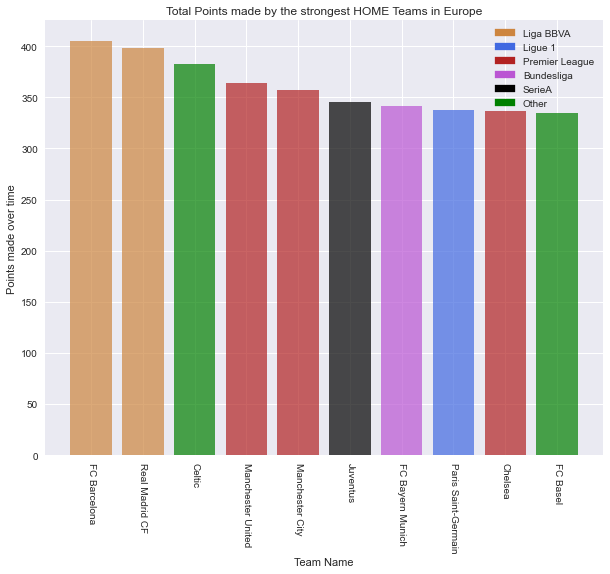

In [32]:
# Groupby 'home team' and the points made when they played at home.

plt.style.use('seaborn')
home_team_score = df_match.groupby(['home_team_name'])['home_points'].sum()

# Find the top 10

home_team_score_10 = home_team_score.nlargest(n = 10)

# Plot

plt.subplots(figsize=(10,8))

plt.xticks(rotation=-90)
league_color = ['peru', 'peru', 'green', 'firebrick', 'firebrick', 'black', 'mediumorchid', 'royalblue', 'firebrick', 'green']
plt.bar(home_team_score_10.index, home_team_score_10, alpha=0.7,color=league_color)
plt.xlabel('Team Name')
plt.ylabel('Points made over time')
plt.title('Total Points made by the strongest HOME Teams in Europe');

# Make a legend
import matplotlib.patches as mpatches
LigaBBVA = mpatches.Patch(color='peru', label='Liga BBVA')
Ligue1 = mpatches.Patch(color='royalblue', label='Ligue 1')
Premier = mpatches.Patch(color='firebrick', label='Premier League')
Bundes= mpatches.Patch(color='mediumorchid', label='Bundesliga')
SerieA= mpatches.Patch(color='black', label='SerieA')
Other= mpatches.Patch(color='green', label='Other')
plt.legend(handles=[LigaBBVA,Ligue1,Premier,Bundes,SerieA,Other], loc='best');



>  Thanks to the graph above, it is quite clear which are the top 10 home teams in terms of most points, with **FC Barcelona** being the best performer at home. We can also see that the **Premier League** seems to be more competitive than the others as 3 teams are in the Top 10.

### Research Question 2:  What are the top 10 teams with the strongest  AWAY performance over time?

In [33]:
df_match.groupby(['away_team_name'])['away_points'].sum().sort_values(ascending=False)

away_team_name
FC Barcelona        340
Real Madrid CF      322
Celtic              321
Juventus            288
FC Bayern Munich    282
                   ... 
FC Dordrecht          7
Tubize                7
CD Tenerife           6
CD Numancia           5
Uniao da Madeira      5
Name: away_points, Length: 296, dtype: int64

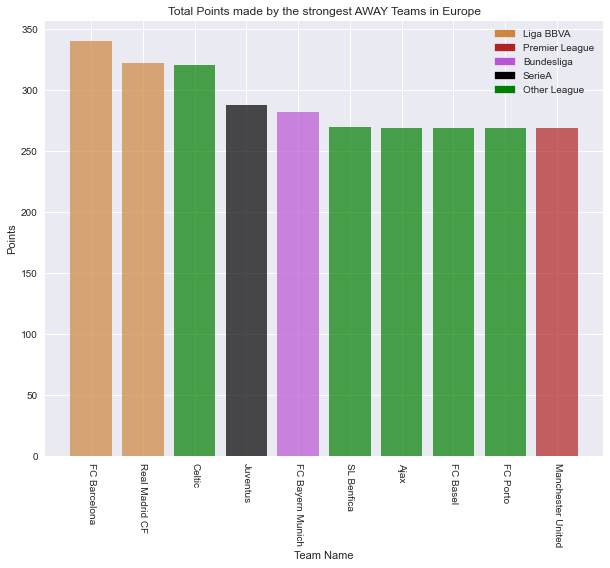

In [34]:
# Groupby 'away team' and the points made when they played at home.

away_team_points = df_match.groupby(['away_team_name'])['away_points'].sum()

# Find the top 10

away_team_points_10 = away_team_points.nlargest(n = 10)

# Plot

plt.subplots(figsize=(10,8))

plt.xticks(rotation=-90)
league_color = ['peru', 'peru', 'green', 'black', 'mediumorchid', 'green', 'green', 'green', 'green', 'firebrick']
plt.bar(away_team_points_10.index, away_team_points_10, alpha=0.7,color=league_color)
plt.xlabel('Team Name')
plt.ylabel('Points')
plt.title('Total Points made by the strongest AWAY Teams in Europe')


# Make a legend
import matplotlib.patches as mpatches
LigaBBVA = mpatches.Patch(color='peru', label='Liga BBVA')
Premier = mpatches.Patch(color='firebrick', label='Premier League')
Bundes= mpatches.Patch(color='mediumorchid', label='Bundesliga')
SerieA= mpatches.Patch(color='black', label='SerieA')
Other= mpatches.Patch(color='green', label='Other League')
plt.legend(handles=[LigaBBVA,Premier,Bundes,SerieA,Other], loc='best');

 > Thanks to the graph above, it is quite clear which are the top 10 AWAY teams in terms of most points, with **FC Barcelona** being the best performer.


### Research Question 3:   Is it true that the Italian League games are more boring because there are no goals, compared to other leagues?


The Italian league is famous for having great defenders in the teams, that makes the public believe that the matches are more boring since there are not many goals. Let's see if that is true!

In [35]:
#Let's create another Data Frame for this question and create a column with total goals in the match:
df= df_match.copy()
df['total_goals']=df.home_team_goal+df.away_team_goal
df2=df.groupby(['season','country_name'])['total_goals'].mean()

In [36]:
#Let's unstack the table with the average goal per season 
df2= df2.unstack(level=1)
df2

country_name,Belgium,England,France,Germany,Italy,Netherlands,Poland,Portugal,Scotland,Spain,Switzerland
season,,,,,,,,,,,
2008/2009,2.794118,2.478947,2.257895,2.921569,2.600000,2.843137,2.183333,2.300000,2.403509,2.897368,3.000000
2009/2010,2.690476,2.771053,2.410526,2.830065,2.610526,2.915033,2.216667,2.504167,2.565789,2.713158,3.327778
2010/2011,2.645833,2.797368,2.342105,2.921569,2.513158,3.225490,2.408333,2.433333,2.561404,2.742105,2.983333
2011/2012,2.879167,2.805263,2.515789,2.859477,2.583799,3.258170,2.195833,2.641667,2.635965,2.763158,2.623457
2012/2013,2.929167,2.797368,2.544737,2.934641,2.639474,3.150327,2.491667,2.779167,2.732456,2.871053,2.566667
2013/2014,2.500000,2.768421,2.455263,3.160131,2.723684,3.196078,2.641667,2.370833,2.745614,2.750000,2.888889
2014/2015,2.783333,2.565789,2.492105,2.754902,2.686016,3.078431,2.616667,2.493464,2.574561,2.655263,2.872222
2015/2016,2.891667,2.700000,2.526316,2.830065,2.576316,2.980392,2.645833,2.715686,2.850877,2.744737,3.144444


''

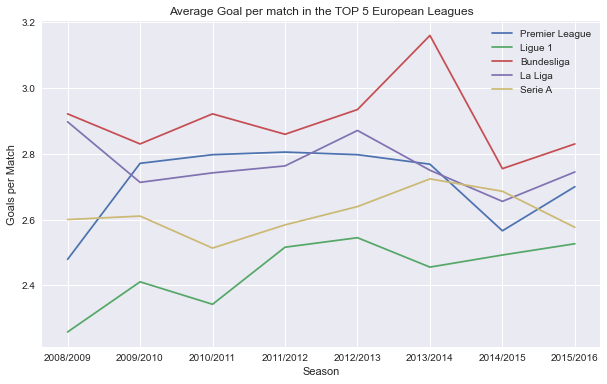

In [37]:
#We will just grab the most popular European Leagues for this exercise

plt.subplots(figsize=(10,6))

plt.plot(df2.index,df2['England'],label=('Premier League'))
plt.plot(df2.index,df2['France'],label=('Ligue 1'))
plt.plot(df2.index,df2['Germany'],label=('Bundesliga'))
plt.plot(df2.index,df2['Spain'],label=('La Liga'))
plt.plot(df2.index,df2['Italy'],label=('Serie A'))


plt.xlabel('Season')
plt.ylabel('Goals per Match')
plt.title('Average Goal per match in the TOP 5 European Leagues')
plt.legend()
;

 > Thanks to the graph above, it is quite clear that the **Italian League (Serie A)** is  not the league with the worst goal average compared to the other major leagues, in fact it is possible to see that the **French League (League 1)** is the one with the worst goal average! 


### Let's explore the distribution of Total Goals data both in Germany and  Italy:

In [38]:
#Let's filter the Italian League and the Geman League and create another Data Frame
df= df_match.query('country_name=="Italy" or country_name=="Germany"').sort_values('season').copy()
df['total_goals']=df.home_team_goal+df.away_team_goal
df.sample(5)

,id,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team_name,away_team_name,home_diff,home_points,away_diff,away_points,winner_team,total_goals
8970,9559,2013/2014,31,2014-04-19 00:00:00,1479271,4,2,Germany,Germany 1. Bundesliga,SC Freiburg,Borussia Mönchengladbach,2,3,-2,0,SC Freiburg,6
8341,9882,2014/2015,33,2015-05-16 00:00:00,1733012,2,0,Germany,Germany 1. Bundesliga,1. FSV Mainz 05,1. FC Köln,2,3,-2,0,1. FSV Mainz 05,2
12003,10322,2008/2009,15,2008-12-07 00:00:00,539702,0,1,Italy,Italy Serie A,Sampdoria,Genoa,-1,0,1,3,Genoa,1
9524,9035,2012/2013,1,2012-08-25 00:00:00,1239460,0,1,Germany,Germany 1. Bundesliga,VfB Stuttgart,VfL Wolfsburg,-1,0,1,3,VfL Wolfsburg,1
12855,12676,2014/2015,24,2015-02-22 00:00:00,1786242,2,0,Italy,Italy Serie A,Milan,Cesena,2,3,-2,0,Milan,2


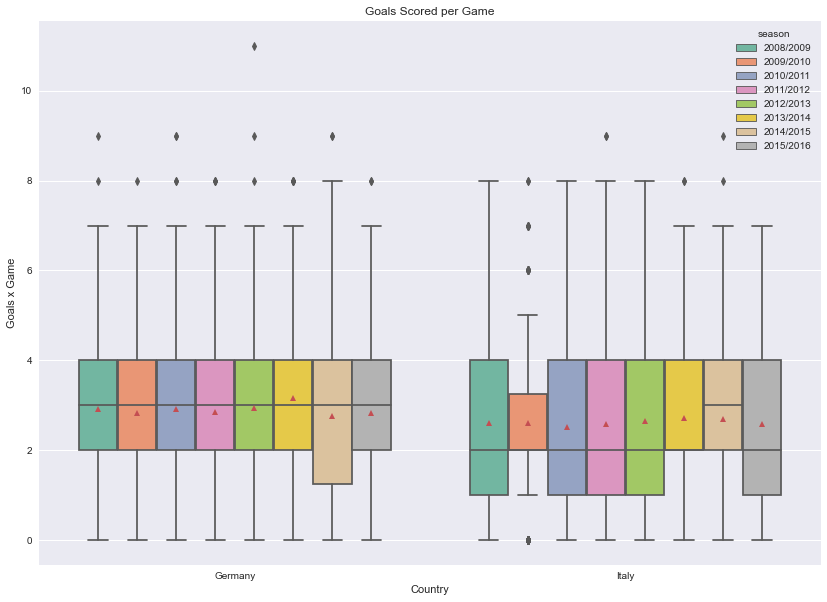

In [39]:
plt.subplots(figsize=(14,10))

sns.boxplot(y='total_goals', x='country_name', 
                 data=df, 
                 palette="Set2",
                 hue='season',showmeans=True)

plt.xlabel('Country')
plt.ylabel('Goals x Game')
plt.title('Goals Scored per Game');


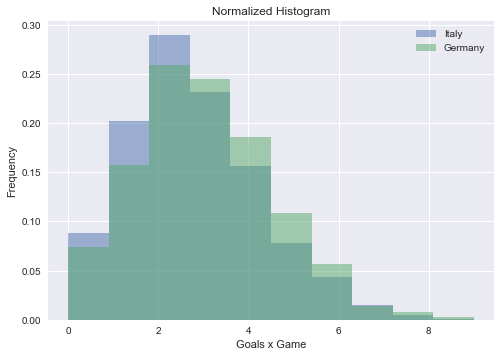

In [40]:
plt.hist(df[df['country_name']=='Italy'].total_goals,density=True,alpha=0.5,bins=10,range=(0,9),label='Italy')
plt.hist(df[df['country_name']=='Germany'].total_goals,density=True,alpha=0.5,bins=10,range=(0,9),label='Germany')
plt.xlabel('Goals x Game')
plt.ylabel('Frequency')
plt.title('Normalized Histogram')
plt.legend();

### Research Question 4:  Which team won on 2014/2015 season in Spain LIGA BBVA?

In [41]:
df_match.query('country_name=="Spain" and season=="2014/2015"').winner_team.value_counts()

Tie                          91
FC Barcelona                 30
Real Madrid CF               30
Atlético Madrid              23
Sevilla FC                   23
Valencia CF                  22
Villarreal CF                16
Rayo Vallecano               15
Athletic Club de Bilbao      15
Málaga CF                    14
RCD Espanyol                 13
RC Celta de Vigo             13
Elche CF                     11
Real Sociedad                11
Getafe CF                    10
SD Eibar                      9
Levante UD                    9
UD Almería                    8
RC Deportivo de La Coruña     7
Granada CF                    7
Córdoba CF                    3
Name: winner_team, dtype: int64

> Based on this query alone is not possible to determine the winner of the 14/15 league! As we see, Barcelona and Madrid have the same amounts of wins, however there are too many ties in the season that can change everything.

Let's create a DF for the strongest 4 candidates to win the season

In [42]:
madrid=df_match.query('country_name=="Spain" and (home_team_name=="Real Madrid CF" or away_team_name=="Real Madrid CF") and season=="2014/2015"').sort_values('date').copy()
barca=df_match.query('country_name=="Spain" and (home_team_name=="FC Barcelona" or away_team_name=="FC Barcelona") and season=="2014/2015"').sort_values('date').copy()
atleti=df_match.query('country_name=="Spain" and (home_team_name=="Atlético Madrid" or away_team_name=="Atlético Madrid") and season=="2014/2015"').sort_values('date').copy()
sevilla=df_match.query('country_name=="Spain" and (home_team_name=="Sevilla FC" or away_team_name=="Sevilla FC") and season=="2014/2015"').sort_values('date').copy()

In [43]:
#Let's see how this looks
atleti.head()

,id,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team_name,away_team_name,home_diff,home_points,away_diff,away_points,winner_team
22089,23800,2014/2015,1,2014-08-25 00:00:00,1778036,0,0,Spain,Spain LIGA BBVA,Rayo Vallecano,Atlético Madrid,0,1,0,1,Tie
24339,23913,2014/2015,2,2014-08-30 00:00:00,1778049,2,1,Spain,Spain LIGA BBVA,Atlético Madrid,SD Eibar,1,3,-1,0,Atlético Madrid
22026,24022,2014/2015,3,2014-09-13 00:00:00,1778058,1,2,Spain,Spain LIGA BBVA,Real Madrid CF,Atlético Madrid,-1,0,1,3,Atlético Madrid
24238,24122,2014/2015,4,2014-09-20 00:00:00,1778068,2,2,Spain,Spain LIGA BBVA,Atlético Madrid,RC Celta de Vigo,0,1,0,1,Tie
22053,24131,2014/2015,5,2014-09-24 00:00:00,1778077,0,1,Spain,Spain LIGA BBVA,UD Almería,Atlético Madrid,-1,0,1,3,Atlético Madrid


To know the exact amount of points for each contender, we will create a function that extracts the points made on each match

In [44]:
def madrid_points(columns):
    points=0
    x='Real Madrid CF'
    home_team_name=columns[0]
    away_team_name=columns[1]
    home_points=columns[2]
    away_points=columns[3]
    
    if home_team_name==x:
        return home_points
    else:
        return away_points
    
def barca_points(columns):
    points=0
    x='FC Barcelona'
    home_team_name=columns[0]
    away_team_name=columns[1]
    home_points=columns[2]
    away_points=columns[3]
    
    if home_team_name==x:
        return home_points
    else:
        return away_points
    
def atleti_points(columns):
    points=0
    x='Atlético Madrid'
    home_team_name=columns[0]
    away_team_name=columns[1]
    home_points=columns[2]
    away_points=columns[3]
    
    if home_team_name==x:
        return home_points
    else:
        return away_points
    
def sevilla_points(columns):
    points=0
    x='Sevilla FC'
    home_team_name=columns[0]
    away_team_name=columns[1]
    home_points=columns[2]
    away_points=columns[3]
    
    if home_team_name==x:
        return home_points
    else:
        return away_points

In [45]:
madrid['game_points']=madrid[['home_team_name','away_team_name','home_points','away_points']].apply(madrid_points,axis=1)
barca['game_points']=barca[['home_team_name','away_team_name','home_points','away_points']].apply(barca_points,axis=1)
atleti['game_points']=atleti[['home_team_name','away_team_name','home_points','away_points']].apply(atleti_points,axis=1)
sevilla['game_points']=sevilla[['home_team_name','away_team_name','home_points','away_points']].apply(sevilla_points,axis=1)

In [46]:
f"In the 2014/2015 Season, Real Madrid got: {madrid['game_points'].sum()} points, Barcelona got: {barca['game_points'].sum()} points, \
Atletico got: {atleti['game_points'].sum()} points and Sevilla got: {sevilla['game_points'].sum()}"

'In the 2014/2015 Season, Real Madrid got: 92 points, Barcelona got: 94 points, Atletico got: 78 points and Sevilla got: 76'

<img src="https://www.lavanguardia.com/r/GODO/LV/p3/WebSite/Imagenes/2015/05/17/Recortada/LV_20150517_LV_FOTOS_D_54431299096-992x558@LaVanguardia-Web.jpg" width="400" height="400" />

> The Champion of the 2014/2015 Season was **FC Barcelona**

Let's see the evolution of points through each stage!

In [47]:
madrid['acum_points']=madrid.game_points.cumsum()
barca['acum_points']=barca.game_points.cumsum()
atleti['acum_points']=atleti.game_points.cumsum()
sevilla['acum_points']=sevilla.game_points.cumsum()

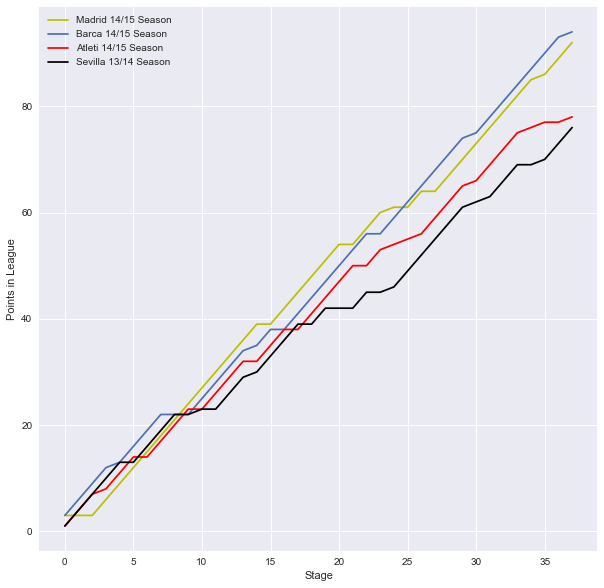

In [48]:
plt.subplots(figsize=(10,10))
plt.plot(range(madrid.stage.max()),madrid.acum_points,label='Madrid 14/15 Season',color='y')
plt.plot(range(barca.stage.max()),barca.acum_points,label='Barca 14/15 Season')
plt.plot(range(atleti.stage.max()),atleti.acum_points,label='Atleti 14/15 Season',color='r')
plt.plot(range(sevilla.stage.max()),sevilla.acum_points,label='Sevilla 13/14 Season',color='black')
plt.legend()
plt.xlabel('Stage')
plt.ylabel('Points in League');

>We can clearly see that Real Madrid was in the top of the league until the stage 25, where Barcelona began to gain more points.

<a id='wrangling2'></a>
## Data Wrangling

 > Key Note: In this section we will solve the last 4 questions mentioned in the introduction regarding player's performance.

### Checking the data and cleanliness

In [49]:
#checking the general table of players
df_player.sample(5)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
4023,4027,5184,Gudmundur Steinarsson,103288,1979-10-20 00:00:00,180.34,170
6706,6716,157869,Marco Natanel Torsiglieri,199726,1988-01-12 00:00:00,190.50,190
10152,10168,299572,Terence Kongolo,203485,1994-02-14 00:00:00,187.96,154
4229,4233,34567,Herold Goulon,184475,1988-06-12 00:00:00,195.58,212
8986,9000,278343,Riyad Mahrez,204485,1991-02-21 00:00:00,177.80,137


In [50]:
#No Null Values
df_player.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [51]:
#No Duplicated Rows
df_player.duplicated().sum()

0

In [52]:
#Let's check the attribute's table
df_player_att.sample(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
14847,14848,156477,38368,2014-11-07 00:00:00,72.0,74.0,right,high,medium,71.0,...,69.0,66.0,66.0,73.0,74.0,9.0,11.0,14.0,12.0,5.0
74307,74308,146701,33856,2015-09-21 00:00:00,74.0,74.0,right,medium,medium,45.0,...,50.0,65.0,74.0,76.0,71.0,7.0,15.0,9.0,8.0,11.0
11519,11520,192073,154239,2015-09-21 00:00:00,77.0,81.0,left,high,medium,74.0,...,76.0,56.0,59.0,72.0,70.0,7.0,8.0,7.0,7.0,9.0
178662,178663,222152,500939,2014-03-21 00:00:00,65.0,78.0,left,high,medium,61.0,...,63.0,67.0,44.0,54.0,50.0,13.0,14.0,6.0,6.0,13.0
126116,126117,110961,33997,2009-02-22 00:00:00,69.0,74.0,left,medium,high,58.0,...,76.0,71.0,72.0,71.0,69.0,12.0,21.0,57.0,21.0,21.0


In [53]:
#No duplicated values
df_player_att.duplicated().sum()

0

In [54]:
#There are some null value, we will drop the rows with null overall_rating as it's an important indicator for our analysis
df_player_att.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [55]:
df_player_att.dropna(how='all',inplace=True)

In [56]:
df_delete=df_player_att[df_player_att.overall_rating.isnull()].copy()

In [57]:
df_player_att.drop(df_delete.index,inplace=True)

In [58]:
#checking
df_player_att.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    2394
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1877
dribbling                 0
curve                  1877
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1877
reactions                 0
balance                1877
shot_power                0
jumping                1877
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                 1877
penalties                 0
marking                   0
standing_tackle     

Let's merge both tables to have a better analysis with the player names.

In [59]:
player_att=df_player_att.merge(df_player, left_on='player_api_id', right_on='player_api_id')

In [60]:
#dropping unnecesary columns
player_att.drop(columns=['id_y', 'player_fifa_api_id_y', 'player_fifa_api_id_x'], inplace=True)

In [61]:
player_att.sample(5)

,id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
105035,105473,198566,2013-05-24 00:00:00,72.0,81.0,right,medium,low,63.0,74.0,...,17.0,5.0,7.0,5.0,11.0,10.0,Luis Alberto,1992-09-28 00:00:00,182.88,159
174821,175631,38366,2014-01-10 00:00:00,73.0,76.0,right,medium,medium,66.0,66.0,...,69.0,9.0,15.0,10.0,12.0,8.0,Vadis Odjidja-Ofoe,1989-02-21 00:00:00,185.42,201
46547,46749,520230,2015-03-20 00:00:00,58.0,66.0,right,medium,medium,40.0,64.0,...,34.0,5.0,14.0,7.0,13.0,14.0,Duncan Watmore,1994-03-08 00:00:00,175.26,159
52403,52634,95228,2013-11-01 00:00:00,71.0,78.0,right,medium,medium,69.0,72.0,...,43.0,11.0,14.0,7.0,10.0,13.0,Fabian Frei,1989-01-08 00:00:00,182.88,170
169253,170048,180302,2014-11-14 00:00:00,57.0,65.0,left,medium,medium,50.0,43.0,...,41.0,8.0,14.0,15.0,14.0,12.0,Thierry Moutinho,1991-02-26 00:00:00,177.80,170


In [62]:
player_att['date']=pd.to_datetime(player_att['date'])

In [63]:
player_att['year']=player_att['date'].apply(lambda x:x.year)

In [64]:
player_att['birthday']=pd.to_datetime(player_att['birthday'])

In [65]:
player_att['birth_year']=player_att['birthday'].apply(lambda x:x.year)

In [66]:
player_att.sample(5)

,id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight,year,birth_year
52306,52537,26959,2014-04-04,67.0,67.0,right,medium,medium,53.0,58.0,...,10.0,6.0,11.0,14.0,Fabian Boll,1979-06-16,193.04,194,2014,1979
86216,86584,159803,2011-02-22,59.0,64.0,right,medium,medium,65.0,32.0,...,8.0,15.0,6.0,7.0,Jonathon Routledge,1989-11-23,182.88,154,2011,1989
74331,74640,37657,2015-10-16,67.0,67.0,right,medium,medium,68.0,27.0,...,16.0,12.0,10.0,13.0,Izidoro Gomez,1986-08-01,180.34,157,2015,1986
126686,127232,38717,2008-08-30,82.0,86.0,right,medium,medium,62.0,83.0,...,21.0,48.0,21.0,21.0,Mirko Vucinic,1983-10-01,185.42,168,2008,1983
88656,89031,359190,2014-09-18,73.0,78.0,right,medium,medium,53.0,65.0,...,12.0,8.0,14.0,6.0,Jose Rodriguez,1994-12-16,180.34,150,2014,1994


In [67]:
#let's create a csv
player_att.to_csv("player_clean.csv",index=False)

<a id='eda2'></a>
## Exploratory Data Analysis

 > Key Note: In this section we will solve the last 3 questions mentioned in the introduction.
 
### Basic information of players exploration (Single variable exploration)

In [68]:
player_att[['overall_rating','birth_year', 'height', 'weight']].describe()

,overall_rating,birth_year,height,weight
count,183142.000000,183142.000000,183142.000000,183142.000000
mean,68.600015,1986.802962,181.875925,168.769463
std,7.041139,4.862741,6.394896,15.088820
min,33.000000,1967.000000,157.480000,117.000000
25%,64.000000,1983.000000,177.800000,159.000000
50%,69.000000,1987.000000,182.880000,168.000000
75%,73.000000,1990.000000,185.420000,179.000000
max,94.000000,1999.000000,208.280000,243.000000


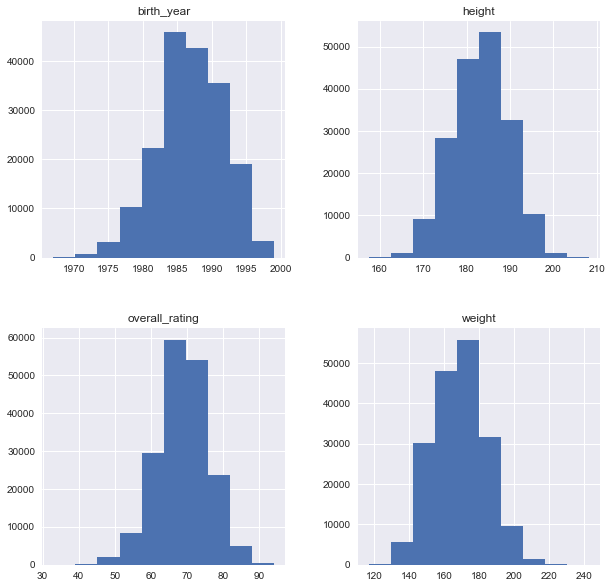

In [69]:
# Visualize the distribution of each variables
player_att[['overall_rating', 'birth_year', 'height', 'weight']].hist(figsize = (10, 10), layout = (2, 2));

### Research Question 5: Which players had the most penalties?

In [70]:
player_att.groupby(['year','player_name']).penalties.max().nlargest(10).sort_index()

year  player_name    
2007  Adrian Mutu        94.0
2008  Andrea Pirlo       95.0
2009  Andrea Pirlo       95.0
2010  Paul Scholes       95.0
      Xavi Hernandez     95.0
2013  Mario Balotelli    95.0
2014  Mario Balotelli    95.0
      Rickie Lambert     95.0
2015  Rickie Lambert     96.0
2016  Rickie Lambert     96.0
Name: penalties, dtype: float64

> By the end of our database (2016), the player with the most penalties is **Rickie Lambert**, reaching 96 penalties.

### Research Question 6: Which player in the European League showed the most improvement over the years?

For this question, let's get more precise and let's see the evolution of players per **season**. To do this, we will use the 'Match' Data Frame from the first part of this project.

In [72]:
#Remembering the Match Data Frame:
df_match.head()

,id,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team_name,away_team_name,home_diff,home_points,away_diff,away_points,winner_team
0,1,2008/2009,1,2008-08-17 00:00:00,492473,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,0,1,0,1,Tie
1,483,2009/2010,5,2009-08-30 00:00:00,665353,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,0,1,0,1,Tie
2,524,2010/2011,1,2010-08-01 00:00:00,838476,2,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,1,3,-1,0,KRC Genk
3,759,2011/2012,1,2011-07-30 00:00:00,1032694,3,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2,3,-2,0,KRC Genk
4,1014,2012/2013,11,2012-10-20 00:00:00,1224064,3,0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,3,3,-3,0,KRC Genk


In [73]:
df_match['date']=pd.to_datetime(df_match['date'])

In [76]:
#Let's see when the season starts and ends by date
seasons=df_match['season'].unique()
for element in seasons:
    min = df_match.query('season == @element')['date'].min()
    max = df_match.query('season == @element')['date'].max()
    print (f'The season: {element} started in: {min} and finished in: {max}')

The season: 2008/2009 started in: 2008-07-18 00:00:00 and finished in: 2009-05-31 00:00:00
The season: 2009/2010 started in: 2009-07-11 00:00:00 and finished in: 2010-05-16 00:00:00
The season: 2010/2011 started in: 2010-07-17 00:00:00 and finished in: 2011-05-29 00:00:00
The season: 2011/2012 started in: 2011-07-16 00:00:00 and finished in: 2012-05-23 00:00:00
The season: 2012/2013 started in: 2012-07-13 00:00:00 and finished in: 2013-06-02 00:00:00
The season: 2014/2015 started in: 2014-07-18 00:00:00 and finished in: 2015-05-31 00:00:00
The season: 2015/2016 started in: 2015-07-17 00:00:00 and finished in: 2016-05-25 00:00:00
The season: 2013/2014 started in: 2013-07-13 00:00:00 and finished in: 2014-05-18 00:00:00


> We can see that regular seasons starts in **July** and finishes at most in **June**.

In [77]:
#Let's create a function to have the season in the Player Attribute Data Frame
def to_season (date):
    if date.month >= 7:
        return str(date.year)+"/"+str(date.year+1)
    else:
        return str(date.year-1)+"/"+str(date.year)
    
# test function
to_season(pd.to_datetime('2008-09-21')), to_season(pd.to_datetime('2010-04-03'))

('2008/2009', '2009/2010')

Let's use this function to add a new column in our **Player Attribute** Data Frame with the season:

In [78]:
player_att['season']=player_att['date'].apply(to_season)
player_att.sample(5)

,id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight,year,birth_year,season
67319,67607,140497,2009-08-30,40.0,71.0,right,medium,medium,41.0,31.0,...,11.0,11.0,7.0,Guillaume Katz,1989-02-14,182.88,172,2009,1989,2009/2010
50127,50349,307021,2007-02-22,65.0,83.0,right,medium,medium,50.0,44.0,...,7.0,12.0,10.0,Emre Can,1994-01-12,187.96,181,2007,1994,2006/2007
102452,102880,38151,2014-12-05,69.0,69.0,right,medium,medium,47.0,48.0,...,9.0,9.0,9.0,Lolo,1984-08-22,182.88,159,2014,1984,2014/2015
146960,147649,40714,2013-12-06,74.0,76.0,right,medium,medium,25.0,25.0,...,74.0,78.0,71.0,Remy Riou,1987-08-06,187.96,179,2013,1987,2013/2014
114946,115444,41923,2014-09-18,70.0,70.0,right,medium,medium,75.0,48.0,...,15.0,6.0,6.0,Markus Steinhoefer,1986-03-07,175.26,152,2014,1986,2014/2015


An example of what we need to do:
    1. We will need to query the player_id or name
    2. We will need to group by season to know the evolution overall rating of the player
    3. Finally, substract the max and min rating. In this example, player with id 505942 had an improvement of 9 points

In [79]:
#1st step
example=player_att.query('player_api_id==505942').copy()
#2nd step
improv= example.groupby('season').overall_rating.mean()
#3rd step
improv.max()-improv.min()

4.333333333333329

Let's create a function for the whole Data Frame!

In [80]:
def rating_improv(player_id):
    season_ratings=player_att.query('player_api_id==@player_id').groupby('season').overall_rating.mean()
    return season_ratings.max() - season_ratings.min()

In [81]:
#Checking the function
rating_improv('505942')

4.333333333333329

**Adding a new column with the player improvement overtime!**

In [82]:
df_player['improvement']=df_player['player_api_id'].apply(lambda x: rating_improv(x))

In [83]:
#Let's sort the new table
df_player.sort_values('improvement',ascending=False).head(10)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,improvement
6715,6725,129944,Marco Reus,188350,1989-05-31 00:00:00,180.34,165,42.000000
3460,3464,41841,Francesco Della Rocca,178043,1987-09-14 00:00:00,182.88,161,39.000000
2835,2838,107417,Eden Hazard,183277,1991-01-07 00:00:00,172.72,163,37.666667
8915,8929,115591,Ricardo Rodriguez,193352,1992-08-25 00:00:00,180.34,170,37.666667
8696,8710,41433,Radja Nainggolan,178518,1988-05-04 00:00:00,175.26,143,37.000000
8178,8190,181297,Oscar de Marcos,190149,1989-04-14 00:00:00,180.34,168,37.000000
1083,1086,46417,Bakary Sako,179613,1988-04-26 00:00:00,182.88,198,37.000000
6088,6095,24235,Leonardo Bonucci,184344,1987-05-01 00:00:00,190.50,190,36.000000
5956,5963,93457,Lamine Kone,184082,1989-02-01 00:00:00,185.42,183,36.000000
3905,3909,35523,Glenn Murray,172937,1983-09-25 00:00:00,185.42,185,36.000000


In [84]:
#Average improve of all European league players
round(df_player['improvement'].mean(),2)

8.46

<img src="https://www.republica.com/wp-content/uploads/2020/04/reus3-768x562.jpg" width="400" height="400" />

> **Marco Reus is the player who has improved the most his overall rating over the seasons in an European League**,

> The normal European Player on average improves 8.5 points in our dataset, while Marco Reus shows an improvement of 42 points

### Research Question 7:  How has the rating of this player improved over the years? 

In [86]:
reus_rating=player_att.query('player_name=="Marco Reus"').groupby('season').overall_rating.mean()
reus_rating

season
2006/2007    44.000000
2008/2009    53.500000
2009/2010    71.000000
2010/2011    76.500000
2011/2012    80.500000
2012/2013    84.000000
2013/2014    84.909091
2014/2015    86.000000
2015/2016    86.000000
Name: overall_rating, dtype: float64

The rating of Marco Reus in 2007/2008 season is missing in the dataset. Let's fill the 2007/2008 season with the mean rating of 2006/2007 season and 2008/2009.

In [88]:
reus_rating['2007/2008']=(reus_rating['2006/2007']+reus_rating['2008/2009'])/2
reus_rating.sort_index(inplace=True)
reus_rating

season
2006/2007    44.000000
2007/2008    48.750000
2008/2009    53.500000
2009/2010    71.000000
2010/2011    76.500000
2011/2012    80.500000
2012/2013    84.000000
2013/2014    84.909091
2014/2015    86.000000
2015/2016    86.000000
Name: overall_rating, dtype: float64

Since the team information of players is not included in the dataset, I decided to search for [Marco Reus team's over the seasons](https://en.wikipedia.org/wiki/Marco_Reus#Club)  and I got the following:

    - Season 2006-2009: Team Rot Weiss Ahlen
    - Season 2009-2012: Team Borussia Mönchengladbach
    - Season 2012-Now: Team Borussia Dortmund

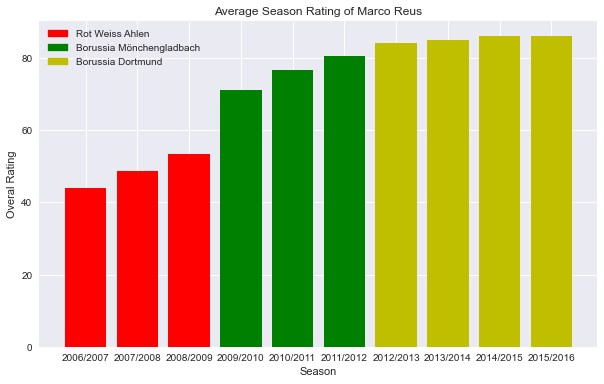

In [89]:
plt.subplots(figsize=(10,6))
team_color = ['r', 'r', 'r', 'g', 'g', 'g', 'y', 'y', 'y', 'y']
plt.bar(reus_rating.index,reus_rating,color=team_color)
plt.title('Average Season Rating of Marco Reus')
plt.xlabel('Season')
plt.ylabel('Overal Rating')

# Make a legend
import matplotlib.patches as mpatches
RWA = mpatches.Patch(color='r', label='Rot Weiss Ahlen')
BM = mpatches.Patch(color='g', label='Borussia Mönchengladbach')
BD = mpatches.Patch(color='y', label='Borussia Dortmund')
plt.legend(handles=[RWA, BM, BD,], loc='best');

> We can see that Marco Reus had an explosive improvement at the end of his time at Rot Weiss Ahlen and then maintained a good growth until becoming one of the best in the German league in Dortmund.

<a id='conc'></a>
## Conclusion

In the current study, a good amount of profound analysis has been carried out. Prior to each step, deailed instructions was given and interpretions was also provided afterwards.

I decided to split the project into two parts: The first one solves questions regarding team performance and the second part is dedicated to explore the data based on individual player stats. With this structure, I hope to give a clearer organization that makes the analysis easier to understand.

**Limitations**: 

> The rating of Marco Reus in season 2007/2008 doesn't exist. This missing value is filled with the mean value of the rating of the former season and the next season. So, it's not real rating but an estimate!

> Each data for the player_attributes is recorded normally from 1 to 3 times per season. This means that the overall_rating is not the value measured after each regular game in season. For a better analysis, how often and how the rating is measured should be clarified.

> There's a lot of missing data for the player attributes table, this discourages the exploration of this data, which could be very interesting to draw conclusions about personal performance